In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_A = pd.read_csv('Week 8/HouseA_HW5.csv')
df_B = pd.read_csv('Week 8/HouseB_HW5.csv')
df_C = pd.read_csv('Week 8/HouseC_HW5.csv')
df_D = pd.read_csv('Week 8/HouseD_HW5.csv')

In [3]:
# Constants
HORIZON = 31*24
SEQUENCE_LENGTH = 4
GAP = 30

In [4]:
# remove trailing whitespace
df_A["Date/Time"] = df_A["Date/Time"].str.strip()
df_B["Date/Time"] = df_B["Date/Time"].str.strip()
df_C["Date/Time"] = df_C["Date/Time"].str.strip()
df_D["Date/Time"] = df_D["Date/Time"].str.strip()

In [5]:
# replace 24:00 with 00:00
df_A["Date/Time"] = df_A["Date/Time"].str.replace("24:00", "00:00")
df_B["Date/Time"] = df_B["Date/Time"].str.replace("24:00", "00:00")
df_C["Date/Time"] = df_C["Date/Time"].str.replace("24:00", "00:00")
df_D["Date/Time"] = df_D["Date/Time"].str.replace("24:00", "00:00")

In [6]:
df_A["Date/Time"]

0      11/29  01:00:00
1      11/29  02:00:00
2      11/29  03:00:00
3      11/29  04:00:00
4      11/29  05:00:00
            ...       
787    12/31  20:00:00
788    12/31  21:00:00
789    12/31  22:00:00
790    12/31  23:00:00
791    12/31  00:00:00
Name: Date/Time, Length: 792, dtype: object

In [7]:
# change date to datetime
df_A["Date/Time"] = pd.to_datetime(df_A["Date/Time"], format="%m/%d %H:%M:%S")
df_B["Date/Time"] = pd.to_datetime(df_B["Date/Time"], format="%m/%d %H:%M:%S")
df_C["Date/Time"] = pd.to_datetime(df_C["Date/Time"], format="%m/%d %H:%M:%S")
df_D["Date/Time"] = pd.to_datetime(df_D["Date/Time"], format="%m/%d %H:%M:%S")

In [8]:
df_BCD = pd.concat([df_B, df_C, df_D], ignore_index=True, axis=1)

In [9]:
df_BCD

,0,1,2,3,4,5
0,1900-01-01 01:00:00,40.793727,1900-01-01 01:00:00,31.905699,1900-01-01 01:00:00,17.540900
1,1900-01-01 02:00:00,41.837084,1900-01-01 02:00:00,33.507795,1900-01-01 02:00:00,17.092382
2,1900-01-01 03:00:00,41.642094,1900-01-01 03:00:00,33.627417,1900-01-01 03:00:00,16.768862
3,1900-01-01 04:00:00,42.812967,1900-01-01 04:00:00,35.474427,1900-01-01 04:00:00,16.972979
4,1900-01-01 05:00:00,44.793965,1900-01-01 05:00:00,35.959651,1900-01-01 05:00:00,17.180736
...,...,...,...,...,...,...
8011,1900-11-30 20:00:00,26.424780,1900-11-30 20:00:00,11.941523,1900-11-30 20:00:00,11.588644
8012,1900-11-30 21:00:00,26.270907,1900-11-30 21:00:00,12.091889,1900-11-30 21:00:00,12.336184
8013,1900-11-30 22:00:00,25.880839,1900-11-30 22:00:00,13.430376,1900-11-30 22:00:00,13.060969
8014,1900-11-30 23:00:00,25.476308,1900-11-30 23:00:00,14.736651,1900-11-30 23:00:00,13.687397


In [10]:
df_BCD.rename(columns={0: "Date/Time", 1: "B", 3: "C", 5: "D"}, inplace=True)

In [11]:
df_BCD.drop(columns=[4,2], inplace=True)

In [12]:
df_BCD[df_BCD["Date/Time"].dt.day==29]

,Date/Time,B,C,D
672,1900-01-29 01:00:00,29.435676,34.895289,32.812188
673,1900-01-29 02:00:00,29.584749,37.508528,32.462379
674,1900-01-29 03:00:00,30.409099,39.169765,32.435030
675,1900-01-29 04:00:00,30.725729,40.989991,31.756874
676,1900-01-29 05:00:00,31.061043,40.291731,31.550131
...,...,...,...,...
7987,1900-11-29 20:00:00,23.360755,12.033279,11.681949
7988,1900-11-29 21:00:00,24.305579,11.750384,12.262237
7989,1900-11-29 22:00:00,23.936302,11.628802,12.028030
7990,1900-11-29 23:00:00,23.688028,11.292401,11.440620


<AxesSubplot:xlabel='Date/Time'>

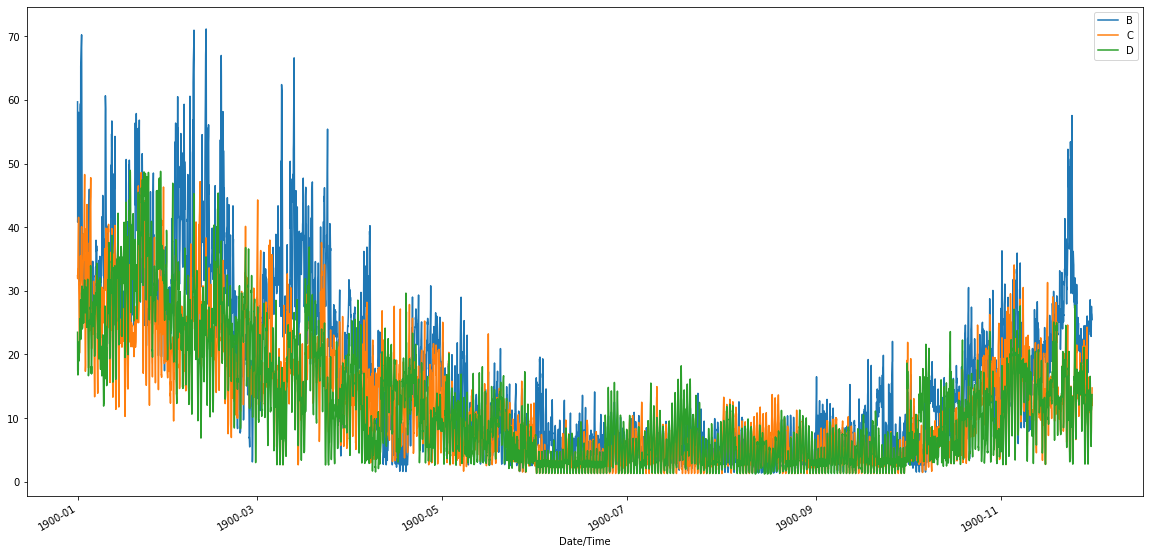

In [13]:
df_BCD.plot(x="Date/Time", y=["B", "C", "D"], figsize=(20,10))

In [14]:
df_BCD["B/C"]=df_BCD["B"]/df_BCD["C"]
df_BCD["B/D"]=df_BCD["B"]/df_BCD["D"]
df_BCD["C/D"]=df_BCD["C"]/df_BCD["D"]

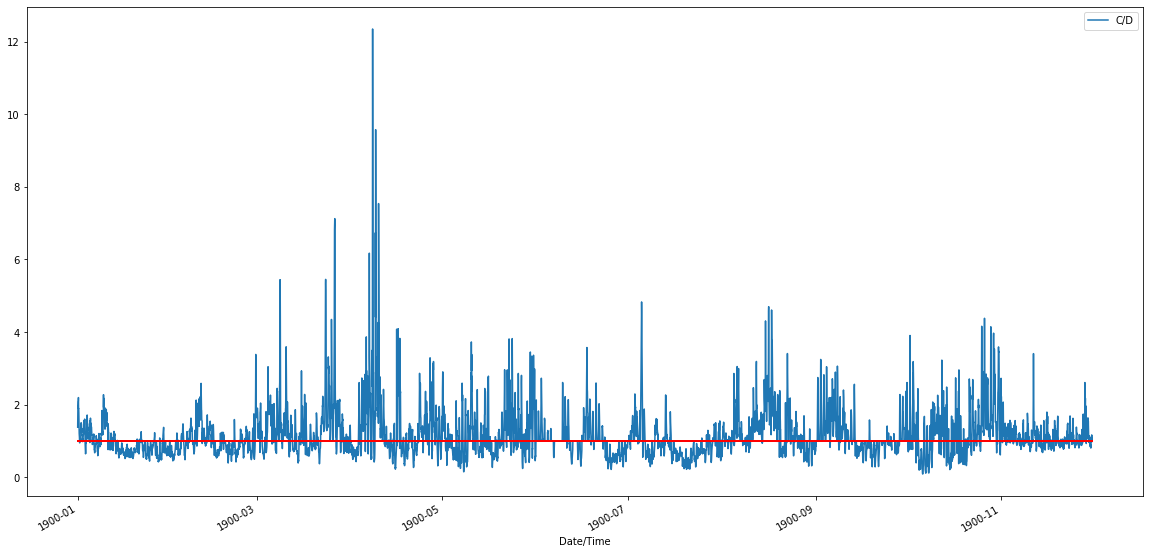

In [15]:
df_BCD.plot(x="Date/Time", y=["C/D"], figsize=(20,10))
plt.plot(df_BCD["Date/Time"], np.ones(len(df_BCD["Date/Time"])), color="red")

In [16]:
# correlation between B and C, B and D, C and D
corr_BCD = df_BCD[["B", "C", "D"]].corr()

In [17]:
corr_BCD

,B,C,D
B,1.000000,0.768727,0.727142
C,0.768727,1.000000,0.830021
D,0.727142,0.830021,1.000000


In [18]:
# covariance between B and C, B and D, C and D
cov_BCD = df_BCD[["B", "C", "D"]].cov()

In [19]:
cov_BCD

,B,C,D
B,163.710704,88.580699,89.733207
C,88.580699,81.106710,72.096316
D,89.733207,72.096316,93.023074


In [20]:
# conversion factor between B and C, B and D, C and D
factor_BCD = df_BCD[["B/C", "B/D", "C/D"]].mean()

In [21]:
factor_BCD

B/C    1.655156
B/D    1.744184
C/D    1.150548
dtype: float64

In [22]:
# correlation between A and B, A and C, A and D
df_A_BCD = pd.merge(df_A, df_BCD, on="Date/Time", how="inner")

In [23]:
df_A_BCD.rename(columns={"Consumption (kW)": "A", "B": "B", "C": "C", "D": "D"}, inplace=True)

In [24]:
df_A_BCD

,Date/Time,A,B,C,D,B/C,B/D,C/D
0,1900-11-29 01:00:00,25.838819,20.981991,21.381186,13.765347,0.981330,1.524262,1.553262
1,1900-11-29 02:00:00,24.278115,21.085455,21.138404,13.463129,0.997495,1.566163,1.570096
2,1900-11-29 03:00:00,23.928772,21.240311,20.514501,14.711747,1.035380,1.443765,1.394430
3,1900-11-29 04:00:00,24.075874,21.344282,21.310040,15.196889,1.001607,1.404517,1.402263
4,1900-11-29 05:00:00,23.865523,21.493626,21.144563,15.137675,1.016508,1.419876,1.396817
5,1900-11-29 06:00:00,24.182503,22.796547,21.950475,15.532112,1.038545,1.467704,1.413232
6,1900-11-29 07:00:00,25.705017,22.837100,24.286128,18.979933,0.940335,1.203223,1.279569
7,1900-11-29 08:00:00,27.918715,26.038020,20.373218,19.190072,1.278051,1.356849,1.061654
8,1900-11-29 09:00:00,26.472519,23.347981,14.571439,12.673663,1.602311,1.842244,1.149742
9,1900-11-29 10:00:00,24.479813,21.883735,11.297508,9.390598,1.937041,2.330388,1.203066


In [25]:
df_A_BCD["A/B"]=df_A_BCD["A"]/df_A_BCD["B"]
df_A_BCD["A/C"]=df_A_BCD["A"]/df_A_BCD["C"]
df_A_BCD["A/D"]=df_A_BCD["A"]/df_A_BCD["D"]

In [26]:
factor_A_BCD = df_A_BCD[["A/B", "A/C", "A/D"]].mean()

In [27]:
factor_A_BCD

A/B    0.983122
A/C    2.158804
A/D    2.462531
dtype: float64

In [28]:
# Use data from November from A for training
df_A_BCD_train = df_A_BCD[df_A_BCD["Date/Time"].dt.month==11]

In [29]:
df_B["y"]

KeyError: 'y'

In [30]:
df_BCD_train = df_BCD[df_BCD["Date/Time"].dt.month<11]

In [31]:
df_D

,Date/Time,All
0,1900-01-01 01:00:00,17.540900
1,1900-01-01 02:00:00,17.092382
2,1900-01-01 03:00:00,16.768862
3,1900-01-01 04:00:00,16.972979
4,1900-01-01 05:00:00,17.180736
...,...,...
8011,1900-11-30 20:00:00,11.588644
8012,1900-11-30 21:00:00,12.336184
8013,1900-11-30 22:00:00,13.060969
8014,1900-11-30 23:00:00,13.687397


In [32]:
# create 4 lags for A
df_A["A_t-1"] = df_A["Consumption (kW)"].shift(1)
df_A["A_t-2"] = df_A["Consumption (kW)"].shift(2)
df_A["A_t-3"] = df_A["Consumption (kW)"].shift(3)
df_A["A_t-4"] = df_A["Consumption (kW)"].shift(4)

In [33]:
df_B["B_t-1"] = df_B["all"].shift(1)
df_B["B_t-2"] = df_B["all"].shift(2)
df_B["B_t-3"] = df_B["all"].shift(3)
df_B["B_t-4"] = df_B["all"].shift(4)
df_B.dropna(inplace=True)

df_C["C_t-1"] = df_C["all"].shift(1)
df_C["C_t-2"] = df_C["all"].shift(2)
df_C["C_t-3"] = df_C["all"].shift(3)
df_C["C_t-4"] = df_C["all"].shift(4)
df_C.dropna(inplace=True)

df_D["D_t-1"] = df_D["All"].shift(1)
df_D["D_t-2"] = df_D["All"].shift(2)
df_D["D_t-3"] = df_D["All"].shift(3)
df_D["D_t-4"] = df_D["All"].shift(4)
df_D.dropna(inplace=True)

X_B = df_B[["B_t-1", "B_t-2", "B_t-3", "B_t-4"]].values
X_C = df_C[["C_t-1", "C_t-2", "C_t-3", "C_t-4"]].values
X_D = df_D[["D_t-1", "D_t-2", "D_t-3", "D_t-4"]].values

y_B = df_B["all"].values
y_C = df_C["all"].values  
y_D = df_D["All"].values

In [34]:
X_BCD = np.concatenate((X_B, X_C, X_D), axis=0)
y_BCD = np.concatenate((y_B, y_C, y_D), axis=0)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler_B = MinMaxScaler()
scaler_C = MinMaxScaler()
scaler_D = MinMaxScaler()

X_B_scaled = scaler_B.fit_transform(X_B)
X_C_scaled = scaler_C.fit_transform(X_C)
X_D_scaled = scaler_D.fit_transform(X_D)

In [38]:
scaler = MinMaxScaler()
X_BCD_scaled = scaler.fit_transform(X_BCD)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [42]:
def deep_model():
    model_deep_A = Sequential()
    model_deep_A.add(Dense(64, activation="relu", input_shape=(4,)))
    model_deep_A.add(Dense(32, activation="relu"))
    model_deep_A.add(Dense(16, activation="relu"))
    model_deep_A.add(Dense(8, activation="relu"))
    model_deep_A.add(Dense(1))

    model_deep_A.compile(optimizer="adam", loss="mse", metrics=["mae", "mape"])
    
    return model_deep_A

In [70]:
model_B = deep_model()
es = EarlyStopping(monitor="val_loss", patience=15, verbose=1, mode="min", restore_best_weights=True)
model_B.fit(X_B_scaled, y_B, epochs=500, batch_size=32, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500


2023-07-02 13:57:27.672951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 135.1312 - mae: 7.3876 - mape: 69.2192

2023-07-02 13:57:35.523350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - 10s 42ms/step - loss: 135.1312 - mae: 7.3876 - mape: 69.2192 - val_loss: 8.3024 - val_mae: 2.0506 - val_mape: 19.4983
Epoch 2/500
201/201 [==============================] - 7s 36ms/step - loss: 8.7443 - mae: 2.0730 - mape: 22.6276 - val_loss: 6.8313 - val_mae: 1.8048 - val_mape: 16.1541
Epoch 3/500
201/201 [==============================] - 7s 37ms/step - loss: 6.6627 - mae: 1.7899 - mape: 18.8629 - val_loss: 4.8931 - val_mae: 1.5087 - val_mape: 13.0955
Epoch 4/500
201/201 [==============================] - 7s 37ms/step - loss: 4.5554 - mae: 1.4318 - mape: 14.4079 - val_loss: 3.9385 - val_mae: 1.3729 - val_mape: 11.6082
Epoch 5/500
201/201 [==============================] - 7s 36ms/step - loss: 3.6001 - mae: 1.2368 - mape: 11.9921 - val_loss: 3.1894 - val_mae: 1.1913 - val_mape: 9.4119
Epoch 6/500
201/201 [==============================] - 7s 36ms/step - loss: 3.2382 - mae: 1.1632 - mape: 11.1488 - val_loss: 2.9664 - val_mae: 1.1804 - val_mape

In [71]:
# freeze the layers
for layer in model_B.layers:
    model_B.get_layer(layer.name).trainable = False
    
model_B.layers[-1].trainable = True
model_B.layers[-2].trainable = True

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# model_B.compile(optimizer=optimizer, loss="mse", metrics=["mae", "mape"])

In [72]:
model_B.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                320       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,073
Trainable params: 145
Non-trainable params: 2,928
_________________________________________________________________


In [73]:
model_B.fit(X_A_train_scaled, y_A_train, epochs=500, batch_size=4, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500


2023-07-02 14:12:27.486871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 250.8409 - mae: 11.8999 - mape: 50.2661

2023-07-02 14:12:29.504125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 3s 216ms/step - loss: 250.8409 - mae: 11.8999 - mape: 50.2661 - val_loss: 123.4483 - val_mae: 10.6240 - val_mape: 58.6548
Epoch 2/500
9/9 [==============================] - 1s 64ms/step - loss: 90.7670 - mae: 8.3412 - mape: 38.3010 - val_loss: 65.2257 - val_mae: 6.5304 - val_mape: 38.7273
Epoch 3/500
9/9 [==============================] - 1s 59ms/step - loss: 34.4663 - mae: 4.7723 - mape: 21.5971 - val_loss: 62.3036 - val_mae: 6.5191 - val_mape: 38.4901
Epoch 4/500
9/9 [==============================] - 0s 51ms/step - loss: 16.1955 - mae: 3.2672 - mape: 15.6395 - val_loss: 74.6330 - val_mae: 7.8298 - val_mape: 44.8634
Epoch 5/500
9/9 [==============================] - 0s 53ms/step - loss: 16.4323 - mae: 3.1888 - mape: 15.6062 - val_loss: 69.8778 - val_mae: 7.5485 - val_mape: 43.3266
Epoch 6/500
9/9 [==============================] - 0s 52ms/step - loss: 12.1948 - mae: 2.7036 - mape: 13.1725 - val_loss: 61.8872 - val_mae: 6.9942 - val_mape: 40.3636

In [74]:
model_B.evaluate(X_A_test_scaled, y_A_test)

24/24 [==============================] - 1s 29ms/step - loss: 3.0947 - mae: 1.2496 - mape: 4.8516


[3.0946645736694336, 1.249584436416626, 4.851589679718018]

In [75]:
model_C = deep_model()
# es = EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="min", restore_best_weights=True)
model_C.fit(X_C_scaled, y_C, epochs=500, batch_size=32, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500


2023-07-02 14:14:25.728270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 67.7360 - mae: 5.2469 - mape: 65.7747

2023-07-02 14:14:33.345566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - 9s 41ms/step - loss: 67.7360 - mae: 5.2469 - mape: 65.7747 - val_loss: 8.0182 - val_mae: 2.0399 - val_mape: 24.7842
Epoch 2/500
201/201 [==============================] - 8s 40ms/step - loss: 5.8655 - mae: 1.7299 - mape: 23.4715 - val_loss: 5.2193 - val_mae: 1.5819 - val_mape: 17.5233
Epoch 3/500
201/201 [==============================] - 7s 36ms/step - loss: 3.2664 - mae: 1.2178 - mape: 15.2336 - val_loss: 3.5289 - val_mae: 1.2291 - val_mape: 12.9396
Epoch 4/500
201/201 [==============================] - 8s 39ms/step - loss: 2.4899 - mae: 1.0194 - mape: 12.1448 - val_loss: 3.6480 - val_mae: 1.3728 - val_mape: 13.9979
Epoch 5/500
201/201 [==============================] - 7s 36ms/step - loss: 2.3931 - mae: 0.9917 - mape: 11.6146 - val_loss: 3.0352 - val_mae: 1.1473 - val_mape: 11.9196
Epoch 6/500
201/201 [==============================] - 7s 35ms/step - loss: 2.3014 - mae: 0.9814 - mape: 11.5875 - val_loss: 3.0720 - val_mae: 1.1359 - val_mape:

In [76]:
# freeze the layers
for layer in model_C.layers:
    model_C.get_layer(layer.name).trainable = False
    
model_C.layers[-1].trainable = True
model_C.layers[-2].trainable = True

In [77]:
model_C.fit(X_A_train_scaled, y_A_train, epochs=500, batch_size=4, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500


2023-07-02 14:23:00.892435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 55.8636 - mae: 6.3849 - mape: 28.9058

2023-07-02 14:23:02.820686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 3s 208ms/step - loss: 55.8636 - mae: 6.3849 - mape: 28.9058 - val_loss: 81.3972 - val_mae: 8.4178 - val_mape: 47.7590
Epoch 2/500
9/9 [==============================] - 1s 59ms/step - loss: 16.6799 - mae: 3.2720 - mape: 15.2995 - val_loss: 43.8276 - val_mae: 5.8503 - val_mape: 33.7677
Epoch 3/500
9/9 [==============================] - 1s 55ms/step - loss: 8.9976 - mae: 2.3106 - mape: 10.9656 - val_loss: 58.5155 - val_mae: 7.3238 - val_mape: 40.8974
Epoch 4/500
9/9 [==============================] - 0s 50ms/step - loss: 8.5911 - mae: 2.4591 - mape: 11.2829 - val_loss: 43.6393 - val_mae: 6.1812 - val_mape: 34.7747
Epoch 5/500
9/9 [==============================] - 0s 50ms/step - loss: 6.1175 - mae: 1.8360 - mape: 8.4577 - val_loss: 46.5626 - val_mae: 6.5195 - val_mape: 36.2987
Epoch 6/500
9/9 [==============================] - 0s 49ms/step - loss: 5.9930 - mae: 1.8502 - mape: 8.5193 - val_loss: 41.1614 - val_mae: 6.0955 - val_mape: 33.9714
Epoch 7/5

In [78]:
model_C.evaluate(X_A_test_scaled, y_A_test)

24/24 [==============================] - 1s 30ms/step - loss: 5.1162 - mae: 1.7490 - mape: 6.1211


[5.116178035736084, 1.7490148544311523, 6.12108039855957]

In [79]:
model_D = deep_model()
es = EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="min", restore_best_weights=True)
model_D.fit(X_D_scaled, y_D, epochs=500, batch_size=32, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500


2023-07-02 14:24:12.473668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 75.6552 - mae: 5.4508 - mape: 67.2130

2023-07-02 14:24:19.891193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - 9s 40ms/step - loss: 75.6552 - mae: 5.4508 - mape: 67.2130 - val_loss: 7.7544 - val_mae: 2.1568 - val_mape: 27.5265
Epoch 2/500
201/201 [==============================] - 7s 35ms/step - loss: 5.3546 - mae: 1.7263 - mape: 24.7497 - val_loss: 4.5305 - val_mae: 1.5617 - val_mape: 19.5860
Epoch 3/500
201/201 [==============================] - 7s 35ms/step - loss: 2.7803 - mae: 1.1782 - mape: 15.3144 - val_loss: 2.8619 - val_mae: 1.1168 - val_mape: 13.6687
Epoch 4/500
201/201 [==============================] - 7s 35ms/step - loss: 2.0549 - mae: 0.9601 - mape: 11.8525 - val_loss: 2.6002 - val_mae: 1.0537 - val_mape: 12.8495
Epoch 5/500
201/201 [==============================] - 7s 35ms/step - loss: 1.9708 - mae: 0.9295 - mape: 11.3563 - val_loss: 2.5326 - val_mae: 1.0310 - val_mape: 12.4929
Epoch 6/500
201/201 [==============================] - 7s 35ms/step - loss: 1.9342 - mae: 0.9190 - mape: 11.1228 - val_loss: 2.3799 - val_mae: 1.0172 - val_mape:

In [80]:
# freeze the layers
for layer in model_D.layers:
    model_D.get_layer(layer.name).trainable = False
    
model_D.layers[-1].trainable = True
model_D.layers[-2].trainable = True

In [81]:
model_D.fit(X_A_train_scaled, y_A_train, epochs=500, batch_size=4, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500


2023-07-02 14:29:39.712782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 68.6931 - mae: 7.2235 - mape: 32.6710

2023-07-02 14:29:41.742999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 3s 211ms/step - loss: 68.6931 - mae: 7.2235 - mape: 32.6710 - val_loss: 80.0377 - val_mae: 8.2810 - val_mape: 47.1976
Epoch 2/500
9/9 [==============================] - 1s 66ms/step - loss: 15.0803 - mae: 3.0099 - mape: 13.9962 - val_loss: 55.2256 - val_mae: 6.8094 - val_mape: 38.7894
Epoch 3/500
9/9 [==============================] - 1s 58ms/step - loss: 10.9150 - mae: 2.4086 - mape: 11.4952 - val_loss: 68.2257 - val_mae: 7.9704 - val_mape: 44.3226
Epoch 4/500
9/9 [==============================] - 1s 58ms/step - loss: 7.1147 - mae: 2.0076 - mape: 9.4231 - val_loss: 48.5644 - val_mae: 6.5778 - val_mape: 36.8246
Epoch 5/500
9/9 [==============================] - 0s 48ms/step - loss: 7.1770 - mae: 2.1067 - mape: 9.4224 - val_loss: 54.1420 - val_mae: 7.0989 - val_mape: 39.3041
Epoch 6/500
9/9 [==============================] - 1s 56ms/step - loss: 6.2515 - mae: 1.8166 - mape: 8.3165 - val_loss: 49.6236 - val_mae: 6.7794 - val_mape: 37.5316
Epoch 7/5

In [82]:
model_D.evaluate(X_A_test_scaled, y_A_test)

24/24 [==============================] - 1s 31ms/step - loss: 5.1271 - mae: 1.7289 - mape: 5.9700


[5.127079963684082, 1.7288998365402222, 5.9699931144714355]

In [83]:
preds_B = model_B.predict(X_A_test_scaled)
preds_C = model_C.predict(X_A_test_scaled)
preds_D = model_D.predict(X_A_test_scaled)

preds = np.mean(np.concatenate((preds_B, preds_C, preds_D), axis=1), axis=1)
preds.shape


 7/24 [=======>......................] - ETA: 0s

2023-07-02 14:30:47.832776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 7/24 [=======>......................] - ETA: 0s

2023-07-02 14:30:48.322318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 7/24 [=======>......................] - ETA: 0s

2023-07-02 14:30:48.793205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 10ms/step


(744,)

In [91]:
# concatenate the 3 models into one big model
inputs_B = tf.keras.Input(shape=(4,))
inputs_C = tf.keras.Input(shape=(4,))
inputs_D = tf.keras.Input(shape=(4,))
inputs = tf.keras.layers.concatenate([inputs_B, inputs_C, inputs_D])
x_B = model_B(inputs_B)
x_C = model_C(inputs_C)
x_D = model_D(inputs_D)
x = tf.keras.layers.concatenate([x_B, x_C, x_D])
outputs = tf.keras.layers.Dense(1)(x)

model_BCD = tf.keras.Model(inputs=[inputs_B, inputs_C, inputs_D], outputs=outputs)

In [93]:
# import plot model
from tensorflow.keras.utils import plot_model

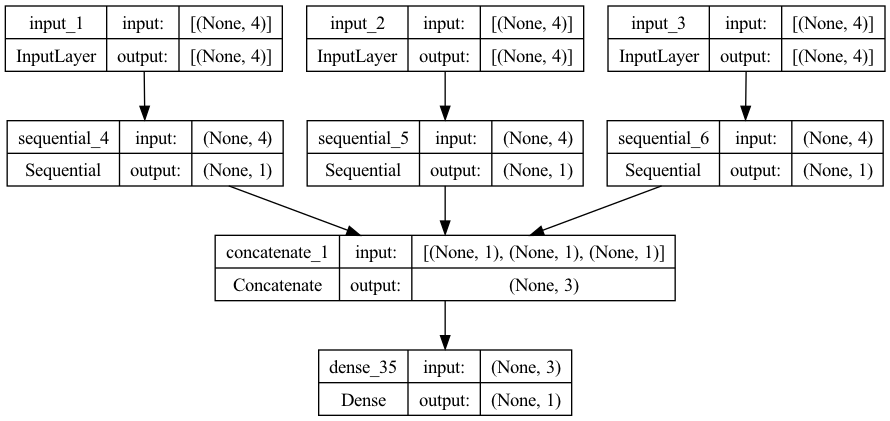

In [94]:
plot_model(model_BCD, show_shapes=True)

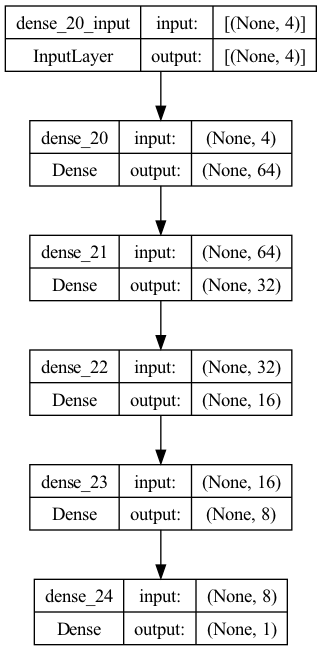

In [114]:
plot_model(model_B, show_shapes=True)

In [92]:
model_BCD.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 sequential_4 (Sequential)      (None, 1)            3073        ['input_1[0][0]']                
                                                                                              

In [95]:
model_BCD.compile(optimizer="adam", loss="mse", metrics=["mae", "mape"])

In [96]:
model_BCD.fit([X_A_train_scaled, X_A_train_scaled, X_A_train_scaled], y_A_train, epochs=500, batch_size=4, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/500


2023-07-02 18:40:53.623030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 15.9738 - mae: 3.7654 - mape: 15.7852

2023-07-02 18:40:56.777437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 6s 317ms/step - loss: 15.9738 - mae: 3.7654 - mape: 15.7852 - val_loss: 5.3254 - val_mae: 2.1795 - val_mape: 12.0889
Epoch 2/500
9/9 [==============================] - 1s 87ms/step - loss: 4.2960 - mae: 1.7478 - mape: 7.2014 - val_loss: 1.3247 - val_mae: 0.8128 - val_mape: 4.8554
Epoch 3/500
9/9 [==============================] - 1s 76ms/step - loss: 1.9094 - mae: 1.0707 - mape: 4.6180 - val_loss: 1.3437 - val_mae: 1.0909 - val_mape: 5.8710
Epoch 4/500
9/9 [==============================] - 1s 69ms/step - loss: 2.1612 - mae: 1.1459 - mape: 5.0300 - val_loss: 1.3418 - val_mae: 1.0899 - val_mape: 5.8669
Epoch 5/500
9/9 [==============================] - 1s 70ms/step - loss: 1.8188 - mae: 1.0144 - mape: 4.4196 - val_loss: 1.1501 - val_mae: 0.9231 - val_mape: 5.2158
Epoch 6/500
9/9 [==============================] - 1s 65ms/step - loss: 1.5359 - mae: 0.9180 - mape: 3.9211 - val_loss: 1.2041 - val_mae: 0.8598 - val_mape: 5.0086
Epoch 7/500
9/9 [=======

In [97]:
preds = model_BCD.predict([X_A_test_scaled, X_A_test_scaled, X_A_test_scaled])

2023-07-02 18:41:19.797224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 2s 37ms/step


In [98]:
mse = mean_squared_error(y_A_test, preds)
mae = mean_absolute_error(y_A_test, preds)
mape = mean_absolute_percentage_error(y_A_test, preds)

print("MSE: ", mse)
print("MAE: ", mae)
print("MAPE: ", mape)

MSE:  8.556390727012264
MAE:  2.254068389139639
MAPE:  0.07462420740672719


In [85]:
y_A_test

48     23.675968
49     25.239773
50     26.844480
51     28.815815
52     30.333043
         ...    
787    23.850543
788    23.654771
789    22.806547
790    21.532958
791    20.632155
Name: Consumption (kW), Length: 744, dtype: float64

In [86]:
preds

array([23.383589 , 24.437815 , 25.774841 , 27.143133 , 28.834105 ,
       30.110788 , 30.003588 , 30.51106  , 30.688616 , 28.67746  ,
       25.819397 , 23.836517 , 16.392822 , 15.438396 , 13.257247 ,
       12.847413 , 15.386559 , 18.575521 , 22.94499  , 23.521837 ,
       24.34809  , 24.770096 , 25.419752 , 25.097116 , 24.764078 ,
       24.018143 , 24.008654 , 23.574987 , 23.836334 , 22.757914 ,
       22.841745 , 24.22441  , 25.497917 , 25.419577 , 24.953003 ,
       26.456629 , 26.609228 , 24.59833  , 24.346802 , 26.010925 ,
       25.601555 , 27.896967 , 31.54511  , 31.603065 , 31.804132 ,
       31.737425 , 32.147015 , 31.660904 , 31.51207  , 31.115347 ,
       33.68077  , 33.00691  , 34.111774 , 33.768513 , 33.94343  ,
       35.77951  , 33.662415 , 33.393566 , 33.05301  , 33.113735 ,
       30.195473 , 30.564346 , 28.98614  , 28.328878 , 26.6604   ,
       26.83837  , 28.181503 , 26.100431 , 24.347963 , 23.796915 ,
       22.05691  , 21.030657 , 19.508945 , 19.015873 , 18.4707

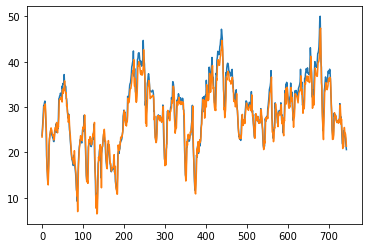

In [87]:
plt.plot(list(y_A_test))
plt.plot(list(preds))

In [88]:
es = EarlyStopping(monitor="val_loss", patience=5, verbose=1)
model_deep_A.fit(X_BCD, y_BCD, epochs=500, batch_size=32, verbose=1, validation_split=0.2, callbacks=[es])

NameError: name 'model_deep_A' is not defined

In [ ]:
df_A_test = df_A[df_A["Date/Time"].dt.month>11]

In [ ]:
df_A_train = df_A[df_A["Date/Time"].dt.month<=11]

In [ ]:
df_A_BCD

,Date/Time,A,B,C,D,B/C,B/D,C/D,A/B,A/C,A/D
0,1900-11-29 01:00:00,25.838819,20.981991,21.381186,13.765347,0.981330,1.524262,1.553262,1.231476,1.208484,1.877092
1,1900-11-29 02:00:00,24.278115,21.085455,21.138404,13.463129,0.997495,1.566163,1.570096,1.151415,1.148531,1.803304
2,1900-11-29 03:00:00,23.928772,21.240311,20.514501,14.711747,1.035380,1.443765,1.394430,1.126574,1.166432,1.626508
3,1900-11-29 04:00:00,24.075874,21.344282,21.310040,15.196889,1.001607,1.404517,1.402263,1.127978,1.129790,1.584263
4,1900-11-29 05:00:00,23.865523,21.493626,21.144563,15.137675,1.016508,1.419876,1.396817,1.110354,1.128684,1.576565
5,1900-11-29 06:00:00,24.182503,22.796547,21.950475,15.532112,1.038545,1.467704,1.413232,1.060797,1.101685,1.556936
6,1900-11-29 07:00:00,25.705017,22.837100,24.286128,18.979933,0.940335,1.203223,1.279569,1.125581,1.058424,1.354326
7,1900-11-29 08:00:00,27.918715,26.038020,20.373218,19.190072,1.278051,1.356849,1.061654,1.072229,1.370364,1.454852
8,1900-11-29 09:00:00,26.472519,23.347981,14.571439,12.673663,1.602311,1.842244,1.149742,1.133825,1.816740,2.088782
9,1900-11-29 10:00:00,24.479813,21.883735,11.297508,9.390598,1.937041,2.330388,1.203066,1.118630,2.166833,2.606843


In [ ]:
df_A_train

,Date/Time,Consumption (kW),A_t-1,A_t-2,A_t-3,A_t-4
0,1900-11-29 01:00:00,25.838819,NaN,NaN,NaN,NaN
1,1900-11-29 02:00:00,24.278115,25.838819,NaN,NaN,NaN
2,1900-11-29 03:00:00,23.928772,24.278115,25.838819,NaN,NaN
3,1900-11-29 04:00:00,24.075874,23.928772,24.278115,25.838819,NaN
4,1900-11-29 05:00:00,23.865523,24.075874,23.928772,24.278115,25.838819
5,1900-11-29 06:00:00,24.182503,23.865523,24.075874,23.928772,24.278115
6,1900-11-29 07:00:00,25.705017,24.182503,23.865523,24.075874,23.928772
7,1900-11-29 08:00:00,27.918715,25.705017,24.182503,23.865523,24.075874
8,1900-11-29 09:00:00,26.472519,27.918715,25.705017,24.182503,23.865523
9,1900-11-29 10:00:00,24.479813,26.472519,27.918715,25.705017,24.182503


In [ ]:
df_A_train = df_A_train.dropna()
X_A_train = df_A_train.drop(columns=["Date/Time", "Consumption (kW)"])
y_A_train = df_A_train["Consumption (kW)"]
scaler = MinMaxScaler()
X_A_train_scaled = scaler.fit_transform(X_A_train)

In [ ]:
model_linear_A = LinearRegression()
model_linear_A.fit(X_A_train_scaled, y_A_train)

LinearRegression()

In [99]:
from xgboost import XGBRegressor

/Users/mamdouhjaber/.pyenv/versions/3.9.12/envs/base-3.9/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
X_A_test = df_A_test.drop(columns=["Date/Time", "Consumption (kW)"])
y_A_test = df_A_test["Consumption (kW)"]
X_A_test_scaled = scaler.transform(X_A_test)

In [ ]:
preds = model_linear_A.predict(X_A_test_scaled)
mse = mean_squared_error(y_A_test, preds)
mae = mean_absolute_error(y_A_test, preds)  
mape = mean_absolute_percentage_error(y_A_test, preds)

print("MSE: ", mse)
print("MAE: ", mae)
print("MAPE: ", mape)

MSE:  3.911576391902783
MAE:  1.5483841020852132
MAPE:  0.05543770562065519


In [89]:
# Use last observation as dummy prediction
dummy_preds = df_A_train["Consumption (kW)"].shift(1).dropna()
mse_dummy = mean_squared_error(y_A_train[1:], dummy_preds)
mae_dummy = mean_absolute_error(y_A_train[1:], dummy_preds)
mape_dummy = mean_absolute_percentage_error(y_A_train[1:], dummy_preds)

print("MSE Dummy: ", mse_dummy)
print("MAE Dummy: ", mae_dummy)
print("MAPE Dummy: ", mape_dummy)

MSE Dummy:  2.5241471411078793
MAE Dummy:  1.260620238604651
MAPE Dummy:  0.059209018016958846


In [90]:
# Use last observation as dummy prediction
dummy_preds = df_A_test["Consumption (kW)"].shift(1).dropna()
mse_dummy = mean_squared_error(y_A_test[1:], dummy_preds)
mae_dummy = mean_absolute_error(y_A_test[1:], dummy_preds)
mape_dummy = mean_absolute_percentage_error(y_A_test[1:], dummy_preds)

print("MSE Dummy: ", mse_dummy)
print("MAE Dummy: ", mae_dummy)
print("MAPE Dummy: ", mape_dummy)

MSE Dummy:  3.1630793437581968
MAE Dummy:  1.277909843921938
MAPE Dummy:  0.049543422050910196


In [ ]:
model_deep_A = Sequential()
model_deep_A.add(Dense(64, activation="relu", input_shape=(4,)))
model_deep_A.add(Dense(32, activation="relu"))
model_deep_A.add(Dense(16, activation="relu"))
model_deep_A.add(Dense(8, activation="relu"))
model_deep_A.add(Dense(1))

model_deep_A.compile(optimizer="adam", loss="mse", metrics=["mae", "mape"])

Metal device set to: AMD Radeon Pro 5500M

systemMemory: 32.00 GB
maxCacheSize: 3.99 GB



2023-07-01 08:37:07.466005: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-01 08:37:07.467287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
es = EarlyStopping(monitor="val_loss", patience=5, verbose=1)
model_deep_A.fit(X_A_train_scaled.reshape(-1, 4, 1), y_A_train, epochs=200, batch_size=4, validation_split=0.2)

Epoch 1/200


2023-07-01 08:37:10.154627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 565.6779 - mae: 23.5082 - mape: 99.4404

2023-07-01 08:37:13.928581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 5s 201ms/step - loss: 565.6779 - mae: 23.5082 - mape: 99.4404 - val_loss: 362.0606 - val_mae: 18.8462 - val_mape: 99.0475
Epoch 2/200
9/9 [==============================] - 1s 66ms/step - loss: 547.8691 - mae: 23.1333 - mape: 97.8494 - val_loss: 353.3181 - val_mae: 18.6210 - val_mape: 97.8827
Epoch 3/200
9/9 [==============================] - 1s 61ms/step - loss: 523.9902 - mae: 22.6223 - mape: 95.6788 - val_loss: 342.1188 - val_mae: 18.3264 - val_mape: 96.3481
Epoch 4/200
9/9 [==============================] - 1s 59ms/step - loss: 492.9911 - mae: 21.9393 - mape: 92.7825 - val_loss: 326.4714 - val_mae: 17.9065 - val_mape: 94.1645
Epoch 5/200
9/9 [==============================] - 1s 59ms/step - loss: 452.7221 - mae: 21.0017 - mape: 88.7229 - val_loss: 305.1702 - val_mae: 17.3176 - val_mape: 91.1020
Epoch 6/200
9/9 [==============================] - 1s 61ms/step - loss: 396.6014 - mae: 19.6518 - mape: 83.0175 - val_loss: 275.8288 - val_mae: 16.4698

In [ ]:
preds = model_deep_A.predict(X_A_test_scaled.reshape(-1, 4, 1))
mse = mean_squared_error(y_A_test, preds)
mae = mean_absolute_error(y_A_test, preds)
mape = mean_absolute_percentage_error(y_A_test, preds)

print("MSE: ", mse)
print("MAE: ", mae)
print("MAPE: ", mape)

 1/24 [>.............................] - ETA: 6s

2023-07-01 08:39:00.561648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 1s 14ms/step
MSE:  3.3222579742208094
MAE:  1.2998768648671994
MAPE:  0.05032356414991313


In [109]:
xgb_A = XGBRegressor()
xgb_A.fit(X_A_train_scaled, y_A_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [110]:
preds_xgb = xgb_A.predict(X_A_test_scaled)

In [111]:
mse_xgb = mean_squared_error(y_A_test, preds_xgb)
mae_xgb = mean_absolute_error(y_A_test, preds_xgb)
mape_xgb = mean_absolute_percentage_error(y_A_test, preds_xgb)

print("MSE: ", mse_xgb)
print("MAE: ", mae_xgb)
print("MAPE: ", mape_xgb)

MSE:  84.30231541864043
MAE:  6.963769895812379
MAPE:  0.21359469089866281


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
arima_A = ARIMA(y_A_train, order=(4,0,4))
arima_A_fit = arima_A.fit()

/Users/mamdouhjaber/.pyenv/versions/3.9.12/envs/base-3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mamdouhjaber/.pyenv/versions/3.9.12/envs/base-3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mamdouhjaber/.pyenv/versions/3.9.12/envs/base-3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mamdouhjaber/.pyenv/versions/3.9.12/envs/base-3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

In [ ]:
arima_A_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Consumption (kW)   No. Observations:                   44
Model:                 ARIMA(4, 0, 4)   Log Likelihood                 -77.416
Date:                Sat, 01 Jul 2023   AIC                            174.833
Time:                        08:39:04   BIC                            192.675
Sample:                             0   HQIC                           181.449
                                 - 44                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6109      2.002     11.295      0.000      18.687      26.534
ar.L1          1.4894      1.499      0.994      0.320      -1.448       4.427
ar.L2          0.1370      3.671      0.037      0.970      -7.058       7.332
ar.L3         -1.4581      3.423     -0.426      0.670      -8.167       5.251
ar.L4          0.7332      1.191      0.616      0.538      -1.601       3.067
ma.L1         -0.5183     15.391     -0.034      0.973     -30.683      29.647
ma.L2         -0.6446      3.071     -0.210      0.834      -6.664       5.375
ma.L3          0.8864     18.991      0.047      0.963     -36.336      38.109
ma.L4          0.1296      2.547      0.051      0.959      -4.862       5.121
sigma2         1.7424     32.926      0.053      0.958     -62.792      66.277
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.86   Prob(JB):                         0.63
Heteroskedasticity (H):               0.62   Skew:                            -0.28
Prob(H) (two-sided):                  0.36   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_A_fit.predict(start=0, end=len(y_A_test)-1)

/Users/mamdouhjaber/.pyenv/versions/3.9.12/envs/base-3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


0      22.610900
1      23.754149
2      24.090689
3      25.718990
4      27.939481
         ...    
739    22.610900
740    22.610900
741    22.610900
742    22.610900
743    22.610900
Name: predicted_mean, Length: 744, dtype: float64

In [ ]:
y_A_test

48     23.675968
49     25.239773
50     26.844480
51     28.815815
52     30.333043
         ...    
787    23.850543
788    23.654771
789    22.806547
790    21.532958
791    20.632155
Name: Consumption (kW), Length: 744, dtype: float64

In [ ]:
preds = arima_A_fit.predict(start=len(y_A_train), end=len(y_A_train)+len(y_A_test)-1)
mse = mean_squared_error(y_A_test, preds)
mae = mean_absolute_error(y_A_test, preds)
mape = mean_absolute_percentage_error(y_A_test, preds)

print("MSE: ", mse)
print("MAE: ", mae)
print("MAPE: ", mape)

MSE:  90.91564935220318
MAE:  7.820929899715176
MAPE:  0.26601308828016845


/Users/mamdouhjaber/.pyenv/versions/3.9.12/envs/base-3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


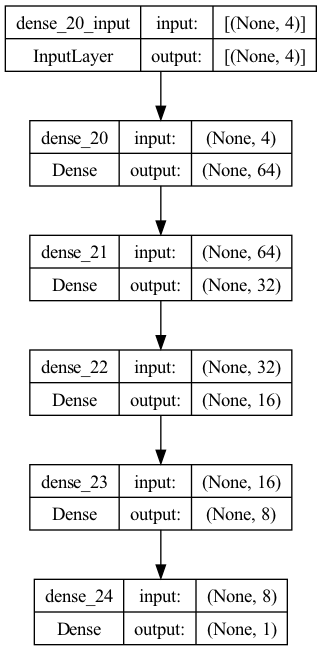

In [116]:
plot_model(model_B, show_shapes=True)

In [117]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(8, activation="relu", input_shape=(4,1)))
model_LSTM.add(Dense(64, activation="relu"))
model_LSTM.add(Dense(32, activation="relu"))
model_LSTM.add(Dense(16, activation="relu"))
model_LSTM.add(Dense(8, activation="relu"))
model_LSTM.add(Dense(1))

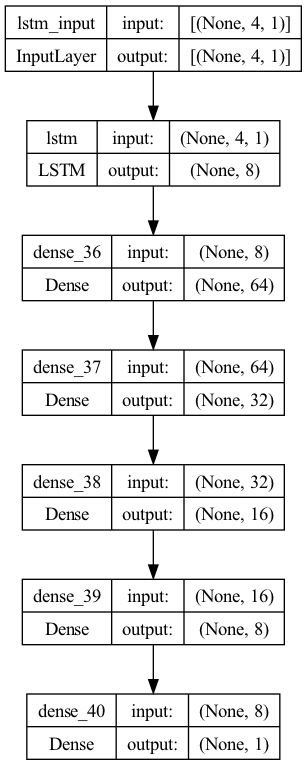

In [118]:
plot_model(model_LSTM, show_shapes=True)